In [1]:
import argparse
import os
import pickle

import torch as T
import yaml
from torch.optim import Adam
from tqdm import tqdm

import sys

sys.path.append('/Users/marcelloceresini/github/FSOD_CenterNet/src')
from data_pipeline import DatasetsGenerator
from model import Model


def load_settings(settings_path: str):
    with open(settings_path, 'r') as f:
        return yaml.safe_load(f)
    
settings = '../settings/model_testing_debug_check_resnet50.yaml'
    
config = load_settings(settings)

if os.path.exists(config['training']['save_base_weights_dir']) \
                and config["training"]["train_base"] \
                and config["training"]["no_overwrite"]:
    raise ValueError("Cannot overwrite weights")

os.makedirs(config['training']['save_training_info_dir'], exist_ok=True)

debug_mode = config['debug']['debug_mode_active']
device = config['device']

K = config['data']['K']
val_K = config['data']['val_K']
test_K = config['data']['test_K']
n_repeats_novel_train = config['training']['repeat_novel_training']

if isinstance(K, int): K = [K]
if isinstance(val_K, int): val_K = [val_K]
if isinstance(test_K, int): test_K = [test_K]

# Dataset generator. Only one of these has to be instantiated. It always returns
dataset_gen = DatasetsGenerator(config)

if config['training']['train_base']:

    # Instantiate the model (only the base part)
    model = Model(config, n_base_classes=len(dataset_gen.train_base.cats))
    model = model.to(device)

    # Use the dataset generator to generate the base set
    dataset_base_train, dataset_base_val, dataset_base_test = dataset_gen.get_base_sets_dataloaders(
        config['training']['batch_size'], config['training']['num_workers'],
        config['training']['pin_memory'], config['training']['drop_last'], 
        shuffle=True
    )
    

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=2.38s)
creating index...
index created!
Skipping instantating novel head


In [2]:
model.load_state_dict(T.load('../../data/weights/from_server/best_model_fix_resnet50.pt', map_location="cpu"))

RuntimeError: Error(s) in loading state_dict for Model:
	Unexpected key(s) in state_dict: "encoder.encoder.layer1.2.conv1.weight", "encoder.encoder.layer1.2.bn1.weight", "encoder.encoder.layer1.2.bn1.bias", "encoder.encoder.layer1.2.bn1.running_mean", "encoder.encoder.layer1.2.bn1.running_var", "encoder.encoder.layer1.2.bn1.num_batches_tracked", "encoder.encoder.layer1.2.conv2.weight", "encoder.encoder.layer1.2.bn2.weight", "encoder.encoder.layer1.2.bn2.bias", "encoder.encoder.layer1.2.bn2.running_mean", "encoder.encoder.layer1.2.bn2.running_var", "encoder.encoder.layer1.2.bn2.num_batches_tracked", "encoder.encoder.layer1.2.conv3.weight", "encoder.encoder.layer1.2.bn3.weight", "encoder.encoder.layer1.2.bn3.bias", "encoder.encoder.layer1.2.bn3.running_mean", "encoder.encoder.layer1.2.bn3.running_var", "encoder.encoder.layer1.2.bn3.num_batches_tracked", "encoder.encoder.layer1.0.conv3.weight", "encoder.encoder.layer1.0.bn3.weight", "encoder.encoder.layer1.0.bn3.bias", "encoder.encoder.layer1.0.bn3.running_mean", "encoder.encoder.layer1.0.bn3.running_var", "encoder.encoder.layer1.0.bn3.num_batches_tracked", "encoder.encoder.layer1.0.downsample.0.weight", "encoder.encoder.layer1.0.downsample.1.weight", "encoder.encoder.layer1.0.downsample.1.bias", "encoder.encoder.layer1.0.downsample.1.running_mean", "encoder.encoder.layer1.0.downsample.1.running_var", "encoder.encoder.layer1.0.downsample.1.num_batches_tracked", "encoder.encoder.layer1.1.conv3.weight", "encoder.encoder.layer1.1.bn3.weight", "encoder.encoder.layer1.1.bn3.bias", "encoder.encoder.layer1.1.bn3.running_mean", "encoder.encoder.layer1.1.bn3.running_var", "encoder.encoder.layer1.1.bn3.num_batches_tracked", "encoder.encoder.layer2.2.conv1.weight", "encoder.encoder.layer2.2.bn1.weight", "encoder.encoder.layer2.2.bn1.bias", "encoder.encoder.layer2.2.bn1.running_mean", "encoder.encoder.layer2.2.bn1.running_var", "encoder.encoder.layer2.2.bn1.num_batches_tracked", "encoder.encoder.layer2.2.conv2.weight", "encoder.encoder.layer2.2.bn2.weight", "encoder.encoder.layer2.2.bn2.bias", "encoder.encoder.layer2.2.bn2.running_mean", "encoder.encoder.layer2.2.bn2.running_var", "encoder.encoder.layer2.2.bn2.num_batches_tracked", "encoder.encoder.layer2.2.conv3.weight", "encoder.encoder.layer2.2.bn3.weight", "encoder.encoder.layer2.2.bn3.bias", "encoder.encoder.layer2.2.bn3.running_mean", "encoder.encoder.layer2.2.bn3.running_var", "encoder.encoder.layer2.2.bn3.num_batches_tracked", "encoder.encoder.layer2.3.conv1.weight", "encoder.encoder.layer2.3.bn1.weight", "encoder.encoder.layer2.3.bn1.bias", "encoder.encoder.layer2.3.bn1.running_mean", "encoder.encoder.layer2.3.bn1.running_var", "encoder.encoder.layer2.3.bn1.num_batches_tracked", "encoder.encoder.layer2.3.conv2.weight", "encoder.encoder.layer2.3.bn2.weight", "encoder.encoder.layer2.3.bn2.bias", "encoder.encoder.layer2.3.bn2.running_mean", "encoder.encoder.layer2.3.bn2.running_var", "encoder.encoder.layer2.3.bn2.num_batches_tracked", "encoder.encoder.layer2.3.conv3.weight", "encoder.encoder.layer2.3.bn3.weight", "encoder.encoder.layer2.3.bn3.bias", "encoder.encoder.layer2.3.bn3.running_mean", "encoder.encoder.layer2.3.bn3.running_var", "encoder.encoder.layer2.3.bn3.num_batches_tracked", "encoder.encoder.layer2.0.conv3.weight", "encoder.encoder.layer2.0.bn3.weight", "encoder.encoder.layer2.0.bn3.bias", "encoder.encoder.layer2.0.bn3.running_mean", "encoder.encoder.layer2.0.bn3.running_var", "encoder.encoder.layer2.0.bn3.num_batches_tracked", "encoder.encoder.layer2.1.conv3.weight", "encoder.encoder.layer2.1.bn3.weight", "encoder.encoder.layer2.1.bn3.bias", "encoder.encoder.layer2.1.bn3.running_mean", "encoder.encoder.layer2.1.bn3.running_var", "encoder.encoder.layer2.1.bn3.num_batches_tracked", "encoder.encoder.layer3.2.conv1.weight", "encoder.encoder.layer3.2.bn1.weight", "encoder.encoder.layer3.2.bn1.bias", "encoder.encoder.layer3.2.bn1.running_mean", "encoder.encoder.layer3.2.bn1.running_var", "encoder.encoder.layer3.2.bn1.num_batches_tracked", "encoder.encoder.layer3.2.conv2.weight", "encoder.encoder.layer3.2.bn2.weight", "encoder.encoder.layer3.2.bn2.bias", "encoder.encoder.layer3.2.bn2.running_mean", "encoder.encoder.layer3.2.bn2.running_var", "encoder.encoder.layer3.2.bn2.num_batches_tracked", "encoder.encoder.layer3.2.conv3.weight", "encoder.encoder.layer3.2.bn3.weight", "encoder.encoder.layer3.2.bn3.bias", "encoder.encoder.layer3.2.bn3.running_mean", "encoder.encoder.layer3.2.bn3.running_var", "encoder.encoder.layer3.2.bn3.num_batches_tracked", "encoder.encoder.layer3.3.conv1.weight", "encoder.encoder.layer3.3.bn1.weight", "encoder.encoder.layer3.3.bn1.bias", "encoder.encoder.layer3.3.bn1.running_mean", "encoder.encoder.layer3.3.bn1.running_var", "encoder.encoder.layer3.3.bn1.num_batches_tracked", "encoder.encoder.layer3.3.conv2.weight", "encoder.encoder.layer3.3.bn2.weight", "encoder.encoder.layer3.3.bn2.bias", "encoder.encoder.layer3.3.bn2.running_mean", "encoder.encoder.layer3.3.bn2.running_var", "encoder.encoder.layer3.3.bn2.num_batches_tracked", "encoder.encoder.layer3.3.conv3.weight", "encoder.encoder.layer3.3.bn3.weight", "encoder.encoder.layer3.3.bn3.bias", "encoder.encoder.layer3.3.bn3.running_mean", "encoder.encoder.layer3.3.bn3.running_var", "encoder.encoder.layer3.3.bn3.num_batches_tracked", "encoder.encoder.layer3.4.conv1.weight", "encoder.encoder.layer3.4.bn1.weight", "encoder.encoder.layer3.4.bn1.bias", "encoder.encoder.layer3.4.bn1.running_mean", "encoder.encoder.layer3.4.bn1.running_var", "encoder.encoder.layer3.4.bn1.num_batches_tracked", "encoder.encoder.layer3.4.conv2.weight", "encoder.encoder.layer3.4.bn2.weight", "encoder.encoder.layer3.4.bn2.bias", "encoder.encoder.layer3.4.bn2.running_mean", "encoder.encoder.layer3.4.bn2.running_var", "encoder.encoder.layer3.4.bn2.num_batches_tracked", "encoder.encoder.layer3.4.conv3.weight", "encoder.encoder.layer3.4.bn3.weight", "encoder.encoder.layer3.4.bn3.bias", "encoder.encoder.layer3.4.bn3.running_mean", "encoder.encoder.layer3.4.bn3.running_var", "encoder.encoder.layer3.4.bn3.num_batches_tracked", "encoder.encoder.layer3.5.conv1.weight", "encoder.encoder.layer3.5.bn1.weight", "encoder.encoder.layer3.5.bn1.bias", "encoder.encoder.layer3.5.bn1.running_mean", "encoder.encoder.layer3.5.bn1.running_var", "encoder.encoder.layer3.5.bn1.num_batches_tracked", "encoder.encoder.layer3.5.conv2.weight", "encoder.encoder.layer3.5.bn2.weight", "encoder.encoder.layer3.5.bn2.bias", "encoder.encoder.layer3.5.bn2.running_mean", "encoder.encoder.layer3.5.bn2.running_var", "encoder.encoder.layer3.5.bn2.num_batches_tracked", "encoder.encoder.layer3.5.conv3.weight", "encoder.encoder.layer3.5.bn3.weight", "encoder.encoder.layer3.5.bn3.bias", "encoder.encoder.layer3.5.bn3.running_mean", "encoder.encoder.layer3.5.bn3.running_var", "encoder.encoder.layer3.5.bn3.num_batches_tracked", "encoder.encoder.layer3.0.conv3.weight", "encoder.encoder.layer3.0.bn3.weight", "encoder.encoder.layer3.0.bn3.bias", "encoder.encoder.layer3.0.bn3.running_mean", "encoder.encoder.layer3.0.bn3.running_var", "encoder.encoder.layer3.0.bn3.num_batches_tracked", "encoder.encoder.layer3.1.conv3.weight", "encoder.encoder.layer3.1.bn3.weight", "encoder.encoder.layer3.1.bn3.bias", "encoder.encoder.layer3.1.bn3.running_mean", "encoder.encoder.layer3.1.bn3.running_var", "encoder.encoder.layer3.1.bn3.num_batches_tracked", "encoder.encoder.layer4.2.conv1.weight", "encoder.encoder.layer4.2.bn1.weight", "encoder.encoder.layer4.2.bn1.bias", "encoder.encoder.layer4.2.bn1.running_mean", "encoder.encoder.layer4.2.bn1.running_var", "encoder.encoder.layer4.2.bn1.num_batches_tracked", "encoder.encoder.layer4.0.conv3.weight", "encoder.encoder.layer4.0.bn3.weight", "encoder.encoder.layer4.0.bn3.bias", "encoder.encoder.layer4.0.bn3.running_mean", "encoder.encoder.layer4.0.bn3.running_var", "encoder.encoder.layer4.0.bn3.num_batches_tracked", "encoder.encoder.layer4.1.conv3.weight", "encoder.encoder.layer4.1.bn3.weight", "encoder.encoder.layer4.1.bn3.bias", "encoder.encoder.layer4.1.bn3.running_mean", "encoder.encoder.layer4.1.bn3.running_var", "encoder.encoder.layer4.1.bn3.num_batches_tracked", "head_regressor.conv3.weight", "head_regressor.conv3.bias", "head_regressor.conv4.weight", "head_regressor.conv4.bias", "head_base_heatmap.conv2.weight", "head_base_heatmap.conv2.bias", "head_base_heatmap.conv3.weight", "head_base_heatmap.conv3.bias". 
	size mismatch for encoder.encoder.layer1.0.conv1.weight: copying a param with shape torch.Size([64, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for encoder.encoder.layer1.1.conv1.weight: copying a param with shape torch.Size([64, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for encoder.encoder.layer2.0.conv1.weight: copying a param with shape torch.Size([128, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).
	size mismatch for encoder.encoder.layer2.0.downsample.0.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 64, 1, 1]).
	size mismatch for encoder.encoder.layer2.0.downsample.1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encoder.layer2.0.downsample.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encoder.layer2.0.downsample.1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encoder.layer2.0.downsample.1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.encoder.layer2.1.conv1.weight: copying a param with shape torch.Size([128, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for encoder.encoder.layer3.0.conv1.weight: copying a param with shape torch.Size([256, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 128, 3, 3]).
	size mismatch for encoder.encoder.layer3.0.downsample.0.weight: copying a param with shape torch.Size([1024, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 128, 1, 1]).
	size mismatch for encoder.encoder.layer3.0.downsample.1.weight: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.encoder.layer3.0.downsample.1.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.encoder.layer3.0.downsample.1.running_mean: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.encoder.layer3.0.downsample.1.running_var: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.encoder.layer3.1.conv1.weight: copying a param with shape torch.Size([256, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for encoder.encoder.layer4.0.conv1.weight: copying a param with shape torch.Size([512, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 3, 3]).
	size mismatch for encoder.encoder.layer4.0.downsample.0.weight: copying a param with shape torch.Size([2048, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 1, 1]).
	size mismatch for encoder.encoder.layer4.0.downsample.1.weight: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.encoder.layer4.0.downsample.1.bias: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.encoder.layer4.0.downsample.1.running_mean: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.encoder.layer4.0.downsample.1.running_var: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for encoder.encoder.layer4.1.conv1.weight: copying a param with shape torch.Size([512, 2048, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for head_regressor.conv2.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([4, 64, 1, 1]).
	size mismatch for head_regressor.conv2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([4]).

In [ ]:
import numpy as np
params = sum([np.prod(p.size()) for p in model.parameters()])
params

13806677

In [ ]:
sum([np.prod(p.size()) for p in model.encoder.parameters()])

11176512

In [ ]:
for i, (input_image, labels, n_detections, _) in enumerate(dataset_base_train):
    out = model(input_image.to(device))
    break

In [ ]:
out_reg, out_head_base, _ = out
regressor_label, heatmap_base, _ = labels

In [ ]:
# regressor_label.shape

torch.Size([8, 4, 32, 32])

In [ ]:
# out_reg[T.where(regressor_label != 0)].shape
# out_reg[T.where(regressor_label != 0)].reshape(-1, 4)[:10]

torch.Size([39])

In [ ]:
regressor_label[T.where(regressor_label != 0)].reshape(-1, 4)[:10]

tensor([[3.4800e+00, 1.0560e+01, 8.5000e-01, 7.7333e-01],
        [3.2302e+01, 1.9743e+01, 1.2619e+01, 1.6242e+01],
        [1.6181e+01, 1.6000e+01, 7.4264e+00, 1.3244e+01],
        [1.1913e+01, 1.6412e+01, 1.3941e+01, 1.2166e+01],
        [1.4638e+01, 9.7584e+00, 7.5472e-01, 8.1509e-01],
        [1.5094e-02, 4.0755e-01, 6.3019e-01, 9.0566e-01],
        [1.9245e-01, 5.5990e-01, 4.4307e-01, 8.4901e-01],
        [7.6980e-01, 4.2723e-01, 2.6485e-01, 1.4604e-01],
        [3.0270e+01, 1.7186e+01, 4.0541e-01, 6.7986e-01],
        [4.5563e+00, 1.0808e+01, 5.3510e+00, 4.0265e+00]])

In [ ]:
out_head_base[T.where(heatmap_base==1)]

tensor([0.0186, 0.0063, 0.0145, 0.0175, 0.0252, 0.0779, 0.0090, 0.0271, 0.0118,
        0.0238], grad_fn=<IndexBackward0>)

In [ ]:
out_head_base.max(), out_head_base.min(), out_head_base.mean()

(tensor(0.2808, grad_fn=<MaxBackward1>),
 tensor(0.0002, grad_fn=<MinBackward1>),
 tensor(0.0030, grad_fn=<MeanBackward0>))

In [ ]:
heatmap_base.max(), heatmap_base.min(), heatmap_base.mean()

(tensor(1.), tensor(0.), tensor(0.0003))

In [ ]:
def heatmap_loss(pred_heatmap, gt_heatmap, num_keypoints, config):
    gt_heatmap = gt_heatmap.to(pred_heatmap.device)
    num_keypoints = num_keypoints.to(pred_heatmap.device)

    loss = T.where(
        gt_heatmap == 1,
        (1 - pred_heatmap) ** config['model']['alpha_loss'] * T.log(pred_heatmap),
        (1 - gt_heatmap) ** config['model']['beta_loss'] * \
            (pred_heatmap) ** config['model']['alpha_loss'] * T.log(1 - pred_heatmap),
    ).reshape(pred_heatmap.shape[0], -1).sum(dim=-1)

    result = T.where(
        num_keypoints != 0,
        input = loss / num_keypoints,
        other = 0
    )

    return -result

In [ ]:
pred_heatmap = out_head_base
gt_heatmap = heatmap_base
num_keypoints = n_detections

gt_heatmap = gt_heatmap.to(pred_heatmap.device)
num_keypoints = num_keypoints.to(pred_heatmap.device)

a1 = (1 - pred_heatmap) ** config['model']['alpha_loss'] * T.log(pred_heatmap)
a2 = (1 - gt_heatmap) ** config['model']['beta_loss'] * (pred_heatmap) ** config['model']['alpha_loss'] * T.log(1 - pred_heatmap)

a1.max(), a1.mean()

(tensor(-0.6568, grad_fn=<MaxBackward1>),
 tensor(-6.0064, grad_fn=<MeanBackward0>))

In [ ]:
a1.shape

torch.Size([8, 240, 32, 32])

In [ ]:
a2.mean(), a2.min()

(tensor(-7.8583e-07, grad_fn=<MeanBackward0>),
 tensor(-0.0260, grad_fn=<MinBackward1>))

In [ ]:
heatmap_loss(out_head_base, heatmap_base, n_detections, config)

tensor([4.0910, 5.4145, 4.2228, 4.1527, 3.5295, 2.2879, 4.2139, 3.6680],
       grad_fn=<NegBackward0>)

In [ ]:
(32*32-1)*-1.0031e-07

-0.00010261713

In [ ]:
import torch.nn.functional as NNF
import torch as T
from torchmetrics.detection import MeanAveragePrecision

@T.no_grad()
def get_heatmap_maxima_idxs(complete_heatmaps):
    pooled_heatmaps = NNF.max_pool2d(complete_heatmaps,
                                    3,
                                    stride=1,
                                    padding=1)
    return (complete_heatmaps == pooled_heatmaps)

def landmarks_from_idxs(regressor_pred: T.tensor,
                        complete_heatmaps: T.tensor,
                        idxs_tensor_mask: T.tensor):
    n_classes, output_width, output_height = idxs_tensor_mask.shape

    num_detections = T.sum(idxs_tensor_mask).to('cpu')
    num_detections = min(100, num_detections) # 10 MAXIMUM DETECTIONS FOR VISUALIZATION
    
    landmarks_pred = {
        "boxes": T.zeros(num_detections,4),
        "labels": T.zeros(num_detections).to(T.int32),
        "scores": T.zeros(num_detections)
    }

    # Flattens it so we can use topk
    confidence_scores = T.masked_select(complete_heatmaps, idxs_tensor_mask)

    # The i-th element in top_k_scores has the i-th highest confidence score in the image, 
    # but its index refers to its position in "confidence_scores" (which is a flattened tensor
    # tthat has as many elements as idxs_tensor_mask's true values, or peaks).
    # Instead, we will need a n_classes*output_width*output_height tensor to get indices
    top_k_scores = T.topk(confidence_scores, num_detections)
    
    # This retrieves all of the (flattened) indices (of the output image) where the classification has a peak
    flattened_idxs = T.nonzero(T.flatten(idxs_tensor_mask)).reshape(-1)

    # this retrieves only the top "num_detections" of them (but still, flattened)
    flattened_top_k_idxs = flattened_idxs[top_k_scores.indices]

    base_mask = T.zeros(n_classes*output_width*output_height).to(device='cpu')
    # Populates the mask with 1s for topk indices
    base_mask[flattened_top_k_idxs] += 1
    mask = base_mask.to(dtype=T.bool)

    top_k_mask = T.unflatten(mask, dim=0, sizes=(n_classes, output_width, output_height))
    top_k_idxs = T.nonzero(top_k_mask)

    print(top_k_idxs)

    regressor_pred_repeated = regressor_pred.repeat(n_classes,1,1,1)

    size_x = T.masked_select(regressor_pred_repeated[:,0,:,:],
                                top_k_mask)
    size_y = T.masked_select(regressor_pred_repeated[:,1,:,:],
                                top_k_mask)
    off_x = T.masked_select(regressor_pred_repeated[:,2,:,:],
                                top_k_mask)
    off_y = T.masked_select(regressor_pred_repeated[:,3,:,:],
                                top_k_mask)

    category = top_k_idxs[:,0]
    center_idx_y = top_k_idxs[:,1]
    center_idx_x = top_k_idxs[:,2]

    center_coord_x = center_idx_x+off_x
    center_coord_y = center_idx_y+off_y

    for i, (c, cx, cy, sx, sy, score) in \
        enumerate(zip(category, center_coord_x, center_coord_y, size_x, size_y, confidence_scores)):

            landmarks_pred["boxes"][i,0] = cx
            landmarks_pred["boxes"][i,1] = cy
            landmarks_pred["boxes"][i,2] = sx
            landmarks_pred["boxes"][i,3] = sy
            landmarks_pred["labels"][i] = c
            landmarks_pred["scores"][i] = score

    return landmarks_pred

In [ ]:
for counter, (image_batch, label_batch, n_landmarks_batch, padded_landmarks) in enumerate(dataset_base_train):

    # both image and landmarks will be resized to model_input_size
    reg_pred_batch, heat_base_pred_batch, heat_novel_pred_batch = model(image_batch.to('cpu'))

    list_landmarks_pred = []
    list_landmarks_gt = []
    
    for i, (reg_pred, heat_base_pred, n_landmarks) in \
        enumerate(zip(reg_pred_batch, heat_base_pred_batch, n_landmarks_batch)):
        complete_heatmaps = heat_base_pred

        idxs_tensor = get_heatmap_maxima_idxs(complete_heatmaps)

        landmarks_pred = landmarks_from_idxs(
            reg_pred,
            complete_heatmaps,
            idxs_tensor
        )

        landmarks_gt = {
            "boxes": padded_landmarks["boxes"][i,:n_landmarks,:],
            "labels": padded_landmarks["labels"][i,:n_landmarks]
        }

        list_landmarks_pred.append(landmarks_pred)
        list_landmarks_gt.append(landmarks_gt)

    break

tensor([[  0,  15,  17],
        [  2,  15,  17],
        [  5,  16,  17],
        [  7,  15,  17],
        [  8,  16,  17],
        [  9,  16,  17],
        [ 13,  15,  17],
        [ 16,  15,  17],
        [ 17,  15,  17],
        [ 22,  16,  17],
        [ 23,  15,  17],
        [ 26,  15,  17],
        [ 27,  15,  17],
        [ 32,  16,  17],
        [ 35,  16,  17],
        [ 36,  15,  17],
        [ 40,  15,  17],
        [ 43,  16,  17],
        [ 49,  15,  17],
        [ 51,  15,  17],
        [ 54,  16,  17],
        [ 55,  15,  17],
        [ 58,  15,  17],
        [ 60,  15,  17],
        [ 67,  16,  17],
        [ 70,  15,  17],
        [ 72,  15,  17],
        [ 73,  15,  17],
        [ 75,  15,  17],
        [ 76,  16,  17],
        [ 77,  16,  17],
        [ 79,  16,  17],
        [ 81,  16,  17],
        [ 82,  15,  17],
        [ 83,  15,  17],
        [ 84,  16,  16],
        [ 87,  15,  17],
        [ 89,  16,  17],
        [ 90,  16,  17],
        [ 91,  15,  17],


In [ ]:
range(len(list_landmarks_pred[0]["labels"]))

range(0, 100)

In [ ]:
def box_and_label_from_landmarks(list_landmarks_unbacthed, max_img_size):
    list_boxes = []
    list_labels = []

    for i in range(len(list_landmarks_unbacthed["labels"])):
        list_boxes.append(T.tensor([
            max(0, 4*(list_landmarks_unbacthed["boxes"][i][0]-list_landmarks_unbacthed["boxes"][i][2])),
            max(0, 4*(list_landmarks_unbacthed["boxes"][i][1]-list_landmarks_unbacthed["boxes"][i][3])),
            min(max_img_size-1, 4*(list_landmarks_unbacthed["boxes"][i][0]+list_landmarks_unbacthed["boxes"][i][2])),
            min(max_img_size-1, 4*(list_landmarks_unbacthed["boxes"][i][1]+list_landmarks_unbacthed["boxes"][i][3])),
                           ]))
        list_labels.append(str(list_landmarks_unbacthed["labels"][i].item()))

    if len(list_boxes)>1:
        list_boxes = T.stack(list_boxes)

    else:
        list_boxes = list_boxes[0].reshape(1,4)
    

    return list_boxes, list_labels

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert

def showgrid(img, heat_gt, heat_pred, land_gt, land_pred):

    batch_size = img.shape[0]
    print()
    f, axarr = plt.subplots(5+10, batch_size, constrained_layout=True, figsize=(13,17))

    # (xmin, ymin, xmax, ymax)

    for b in range(batch_size):

        print(T.max(heat_pred[b]))
        heat_pred[b][:,0,0] = (T.ones_like(heat_pred[b][:,0,0])*T.max(heat_pred[b]))

        # boxes, labels = box_and_label_from_landmarks(land_gt[b], img.shape[-1])
        # print(boxes)
        img_to_plot = draw_bounding_boxes(
            (img[b]*256).to(T.uint8), 
            boxes=box_convert(land_gt[b]["boxes"], in_fmt="cxcywh", out_fmt="xyxy")
        )
        axarr[0,b].imshow(F.to_pil_image(img_to_plot))

        # boxes, labels = box_and_label_from_landmarks(land_pred[b], img.shape[-1])

        land_pred[b]["boxes"][:,:2] = land_pred[b]["boxes"][:,:2] * 4
        boxes = land_pred[b]["boxes"]

        img_to_plot = draw_bounding_boxes(
            (img[b]*256).to(T.uint8), 
            boxes=box_convert(boxes, 
                              in_fmt="cxcywh", 
                              out_fmt="xyxy")
        ) # I ADDED A *4 BUT I'M NOT SURE IT IS NEEDED
        axarr[1,b].imshow(F.to_pil_image(img_to_plot))
        
        axarr[2,b].imshow(F.to_pil_image(T.max(heat_gt[1][b], dim=0).values))
        axarr[3,b].imshow(F.to_pil_image(T.max(heat_pred[b], dim=0).values))

        tmp_label = land_gt[b]["labels"][0]
        axarr[4,b].imshow(F.to_pil_image(heat_pred[b][tmp_label]))


        n_label_gt = 0
        
        c_right = 0
        mean_score_right = 0
        c_wrong = 0
        mean_score_wrong = 0
        
        for label_gt in land_gt[b]["labels"]:
            n_label_gt+=1
            for label_pred, score in zip(land_pred[b]["labels"], land_pred[b]["scores"]):
                if label_gt == label_pred:
                    c_right+=1
                    mean_score_right += score.item()
                else:
                    c_wrong+=1
                    mean_score_wrong += score.item()

        c_right /= n_label_gt
        mean_score_right /= n_label_gt
        if c_right != 0:
            mean_score_right /= c_right
            
        c_wrong /= n_label_gt
        mean_score_wrong /= n_label_gt
        if c_wrong != 0:
            mean_score_wrong /= c_wrong
        print("Image ", b+1, " - Right ", c_right, " - Mean Score ", mean_score_right, " - Wrong ", c_wrong, " - Mean Score ", mean_score_wrong)

        # for i, rand_label in enumerate(T.randint(240, (5,1))):
        #     axarr[5+i,b].imshow(F.to_pil_image(heat_gt[1][b][rand_label]))

    
        for i, rand_label in enumerate(T.randint(240, (10,1))):
            axarr[5+i,b].imshow(F.to_pil_image(heat_pred[b][rand_label]))

    
    for b in axarr.flat:
        plt.axis('on')
        b.set_xticks([])
        b.set_yticks([])

    print("Before plot")
    plt.show()
    print("After plot")



tensor(0.1588)
Image  1  - Right  1.0  - Mean Score  0.0019359647994861007  - Wrong  99.0  - Mean Score  0.004409018093179159
tensor(0.1593)
Image  2  - Right  1.0  - Mean Score  0.0020033810287714005  - Wrong  99.0  - Mean Score  0.0037310149149047305
tensor(0.2032)
Image  3  - Right  1.0  - Mean Score  0.0009386860183440149  - Wrong  99.0  - Mean Score  0.002827531452916299
tensor(0.2408)
Image  4  - Right  1.0  - Mean Score  0.0011536936508491635  - Wrong  99.0  - Mean Score  0.004409390001915245
tensor(0.3596)
Image  5  - Right  5.0  - Mean Score  0.00189157712738961  - Wrong  95.0  - Mean Score  0.0020018601018053136
tensor(0.2691)
Image  6  - Right  1.0  - Mean Score  0.0023925923742353916  - Wrong  99.0  - Mean Score  0.0024310075154650316
tensor(0.1157)
Image  7  - Right  1.0  - Mean Score  0.0013211575569584966  - Wrong  99.0  - Mean Score  0.0036495028291781894
tensor(0.2449)
Image  8  - Right  1.0  - Mean Score  0.002059298101812601  - Wrong  99.0  - Mean Score  0.002259102

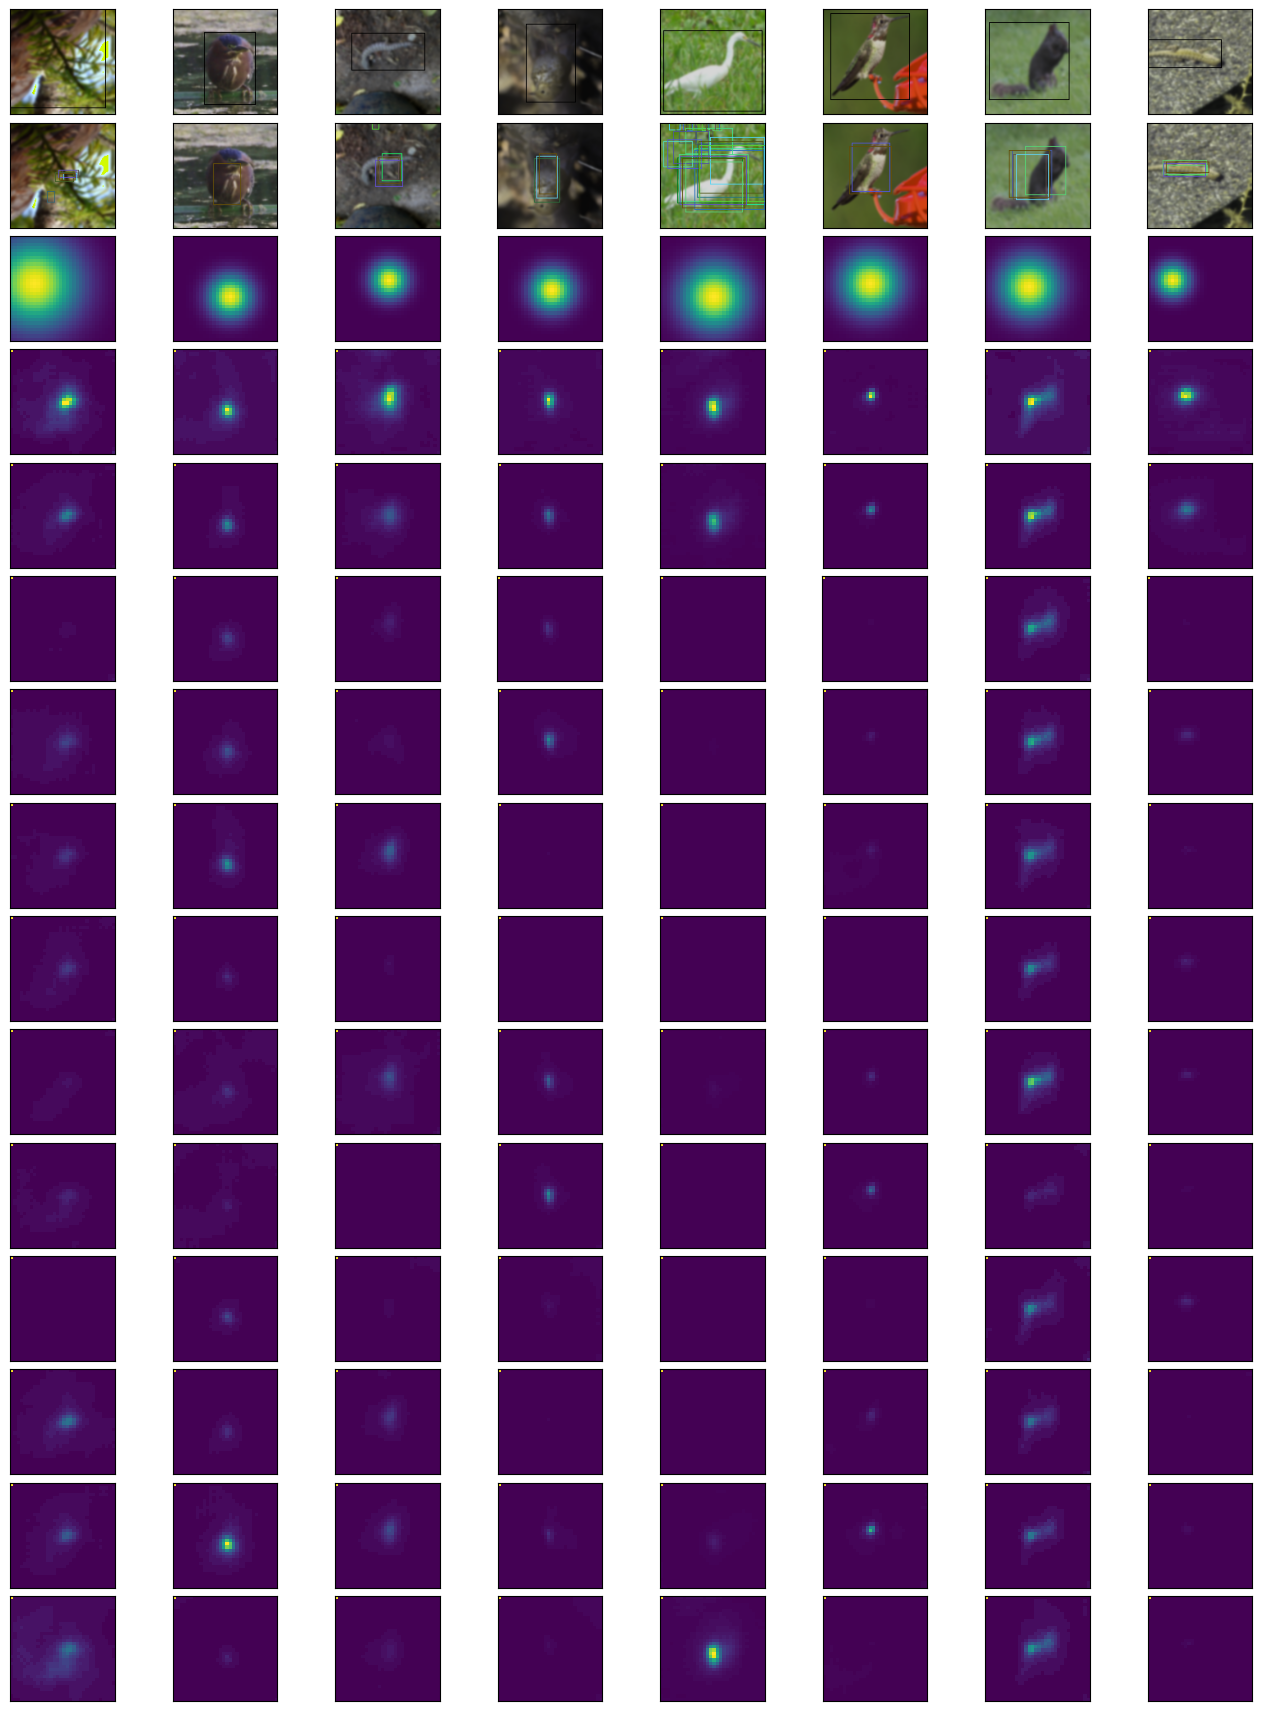

After plot


In [ ]:
import copy
with T.no_grad():
    showgrid(image_batch, copy.copy(label_batch), copy.copy(heat_base_pred_batch), list_landmarks_gt, list_landmarks_pred)